Controlled Area (P = 15 µSv):
  Lead Thickness: 30 mm
  Concrete Thickness: 30 cm
Uncontrolled Area (P = 3 µSv):
  Lead Thickness: 40 mm
  Concrete Thickness: 40 cm


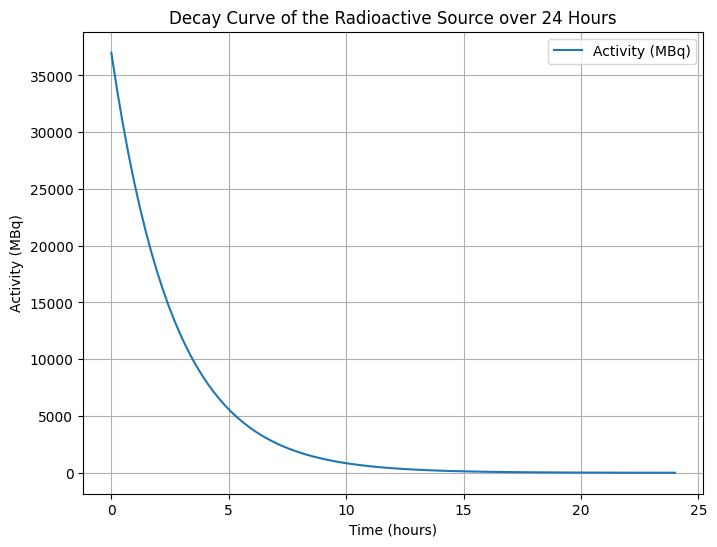

In [3]:


import math
import numpy as np
import matplotlib.pyplot as plt

# Constants
A_source = 37000  # Initial radioactive source activity in MBq
P_controlled = 15  # Daily dose limit for controlled areas (µSv)
P_uncontrolled = 3  # Daily dose limit for uncontrolled areas (µSv)
T = 1  # Occupancy factor
dose_rate_constant = 0.092  # µSv m²/MBq h, dose rate constant for FDG
vial_shielding_factor = 0.2  # 80% shielding by the vial, so 20% of radiation passes through
distance = 1  # Distance from the source to the barrier in meters
half_life = 110  # Half-life of FDG in minutes

# Convert half-life to hours
half_life_hours = half_life / 60

# Transmission factors for Lead and Concrete
transmission_factors = {
    "Lead": {
        0: 1.0000, 1: 0.8912, 2: 0.7873, 3: 0.6905, 4: 0.6021,
        5: 0.5227, 6: 0.4522, 7: 0.3903, 8: 0.3362, 9: 0.2892,
        10: 0.2485, 12: 0.1831, 14: 0.1347, 16: 0.0990, 18: 0.0728,
        20: 0.0535, 25: 0.0247, 30: 0.0114, 40: 0.0024, 50: 0.0005
    },
    "Concrete": {
        0: 1.0000, 1: 0.9583, 2: 0.9088, 3: 0.8519, 4: 0.7889,
        5: 0.7218, 6: 0.6528, 7: 0.5842, 8: 0.5180, 9: 0.4558,
        10: 0.3987, 12: 0.3008, 14: 0.2243, 16: 0.1662, 18: 0.1227,
        20: 0.0904, 25: 0.0419, 30: 0.0194, 40: 0.0042, 50: 0.0009
    }
}

# Function to calculate transmission factor (B)
def calculate_transmission_factor(P, d, T, A_source, shielding_factor):
    B = (P * d ** 2) / (T * A_source * shielding_factor * dose_rate_constant)
    return B

# Function to find the required thickness for a material (Lead/Concrete)
def find_thickness(B, material):
    factors = transmission_factors[material]
    for thickness, factor in factors.items():
        if factor <= B:
            return thickness  # Returns the first thickness where the factor is less than or equal to B
    return None

# Calculate transmission factors for controlled and uncontrolled areas
B_controlled = calculate_transmission_factor(P_controlled, distance, T, A_source, vial_shielding_factor)
B_uncontrolled = calculate_transmission_factor(P_uncontrolled, distance, T, A_source, vial_shielding_factor)

# Calculate required thickness for both Lead and Concrete
lead_thickness_controlled = find_thickness(B_controlled, "Lead")
concrete_thickness_controlled = find_thickness(B_controlled, "Concrete")

lead_thickness_uncontrolled = find_thickness(B_uncontrolled, "Lead")
concrete_thickness_uncontrolled = find_thickness(B_uncontrolled, "Concrete")

# Output results
print(f"Controlled Area (P = {P_controlled} µSv):")
print(f"  Lead Thickness: {lead_thickness_controlled} mm")
print(f"  Concrete Thickness: {concrete_thickness_controlled} cm")

print(f"Uncontrolled Area (P = {P_uncontrolled} µSv):")
print(f"  Lead Thickness: {lead_thickness_uncontrolled} mm")
print(f"  Concrete Thickness: {concrete_thickness_uncontrolled} cm")

# Decay Curve Calculation
def decay_curve(A0, half_life, time_hours):
    """Calculate activity at different times using radioactive decay equation."""
    lambda_decay = math.log(2) / half_life  # Decay constant
    activity_over_time = A0 * np.exp(-lambda_decay * time_hours)
    return activity_over_time

# Generate time values for 24 hours
time_hours = np.linspace(0, 24, 100)  # 100 points between 0 and 24 hours
activity_over_day = decay_curve(A_source, half_life_hours, time_hours)

# Plot the decay curve
plt.figure(figsize=(8, 6))
plt.plot(time_hours, activity_over_day, label="Activity (MBq)")
plt.title("Decay Curve of the Radioactive Source over 24 Hours")
plt.xlabel("Time (hours)")
plt.ylabel("Activity (MBq)")
plt.grid(True)
plt.legend()
plt.show()
